In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


housing = pd.read_csv('../dataset/housing.csv')
# housing.head()

housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
# housing['income_cat'].value_counts() / len(housing) * 100 

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])


housing = strat_train_set.drop('median_house_value', axis=1)

housing_labels = strat_train_set['median_house_value'].copy()



In [3]:
print(housing.shape)
print(housing_labels.shape)

(16512, 10)
(16512,)


In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(housing, title="Housing Data Profiling Report")

profile.to_file("housing_data_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 200.31it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
import dtale
d = dtale.show(housing)
d.open_browser()    

In [11]:
d.kill()

ERROR	Thread(Thread-421 (process_request_thread)) dtale.app:app.py:shutdown_server()- weakly-referenced object no longer exists
ERROR	Thread(Thread-421 (process_request_thread)) dtale.app:app.py:shutdown_server()- weakly-referenced object no longer exists
ERROR	Thread(Thread-421 (process_request_thread)) dtale.app:app.py:shutdown_server()- weakly-referenced object no longer exists
ERROR	Thread(Thread-421 (process_request_thread)) dtale.app:app.py:shutdown_server()- weakly-referenced object no longer exists
ERROR	Thread(Thread-421 (process_request_thread)) dtale.app:app.py:shutdown_server()- weakly-referenced object no longer exists
ERROR	Thread(Thread-421 (process_request_thread)) dtale.app:app.py:shutdown_server()- weakly-referenced object no longer exists
ERROR	Thread(Thread-421 (process_request_thread)) dtale.app:app.py:shutdown_server()- weakly-referenced object no longer exists


# Data Cleaning and Feature Engineering

In [14]:
# remove the income_cat and ocean_proximity 
housing_num = housing.drop(['income_cat', 'ocean_proximity'], axis=1)
housing_cat = housing[['ocean_proximity']]

In [17]:
type(housing_num)

pandas.core.frame.DataFrame

### Numerical Missing value handling

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

imputer.fit(housing_num)
X = imputer.transform(housing_num)

type(X)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

### Feature scaling

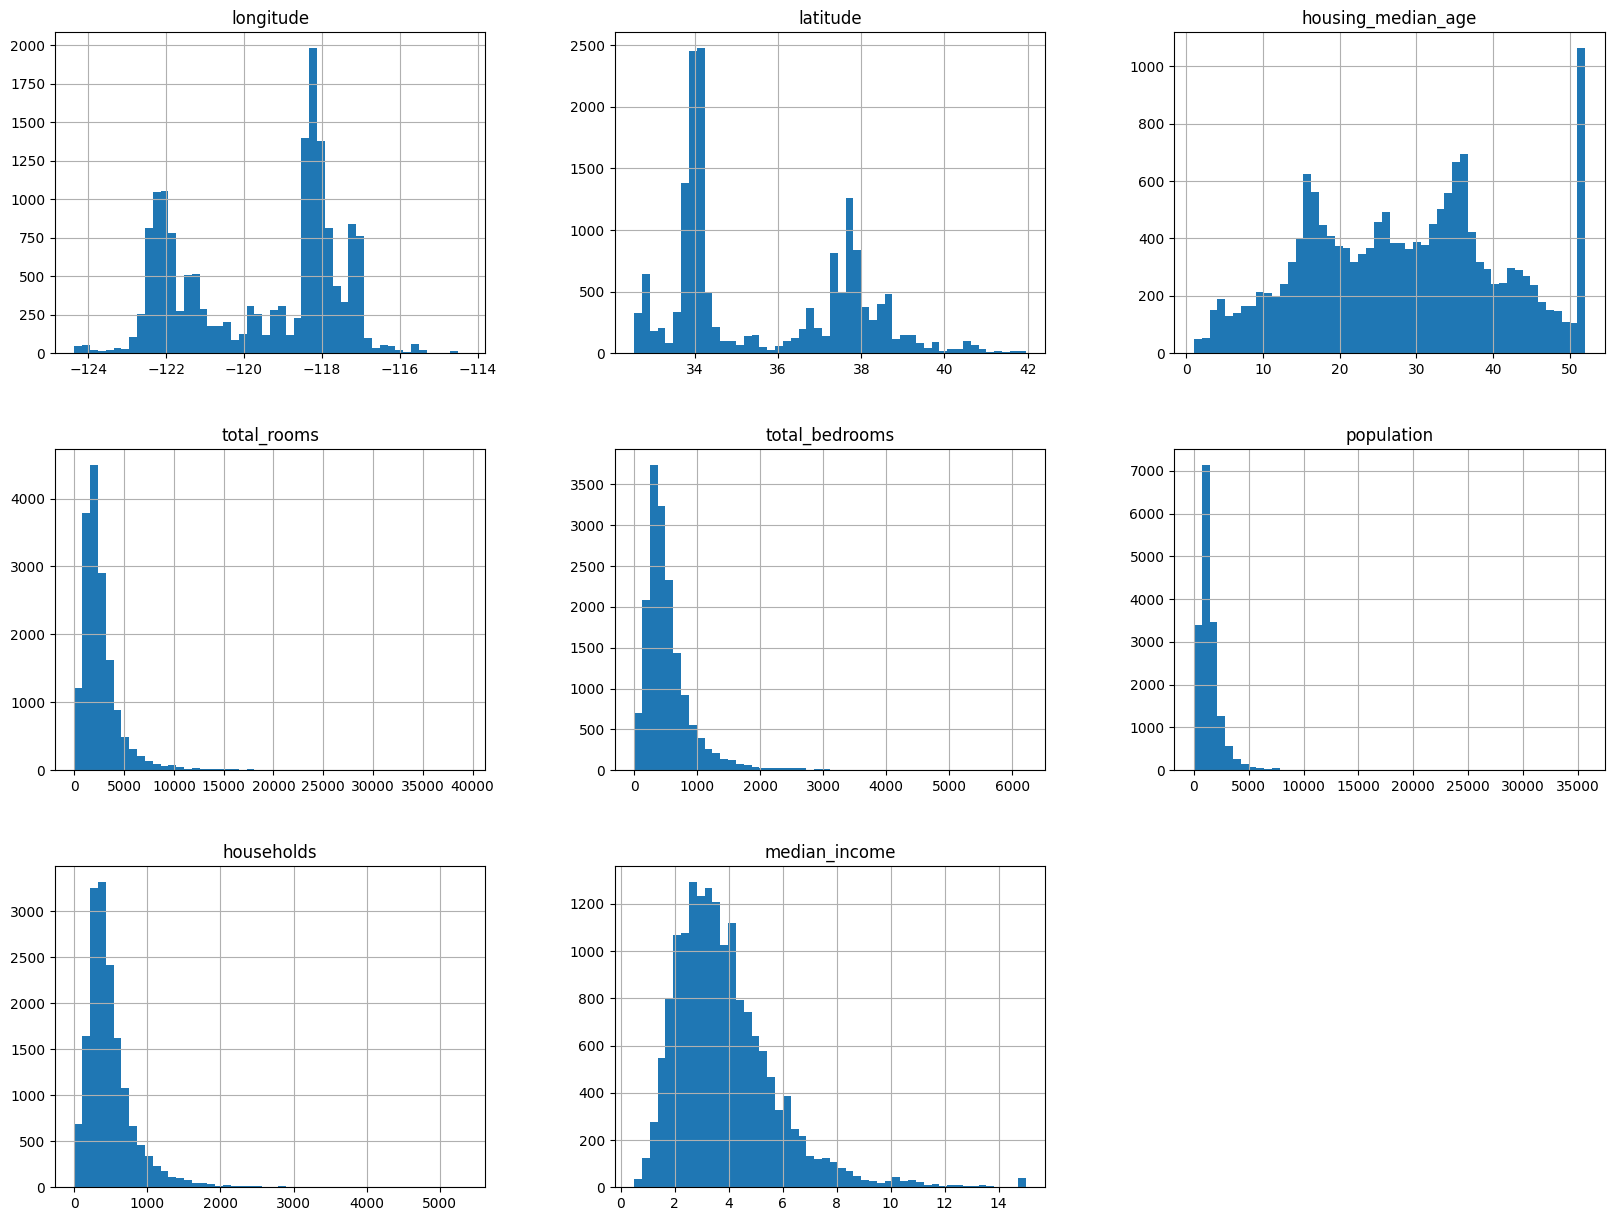

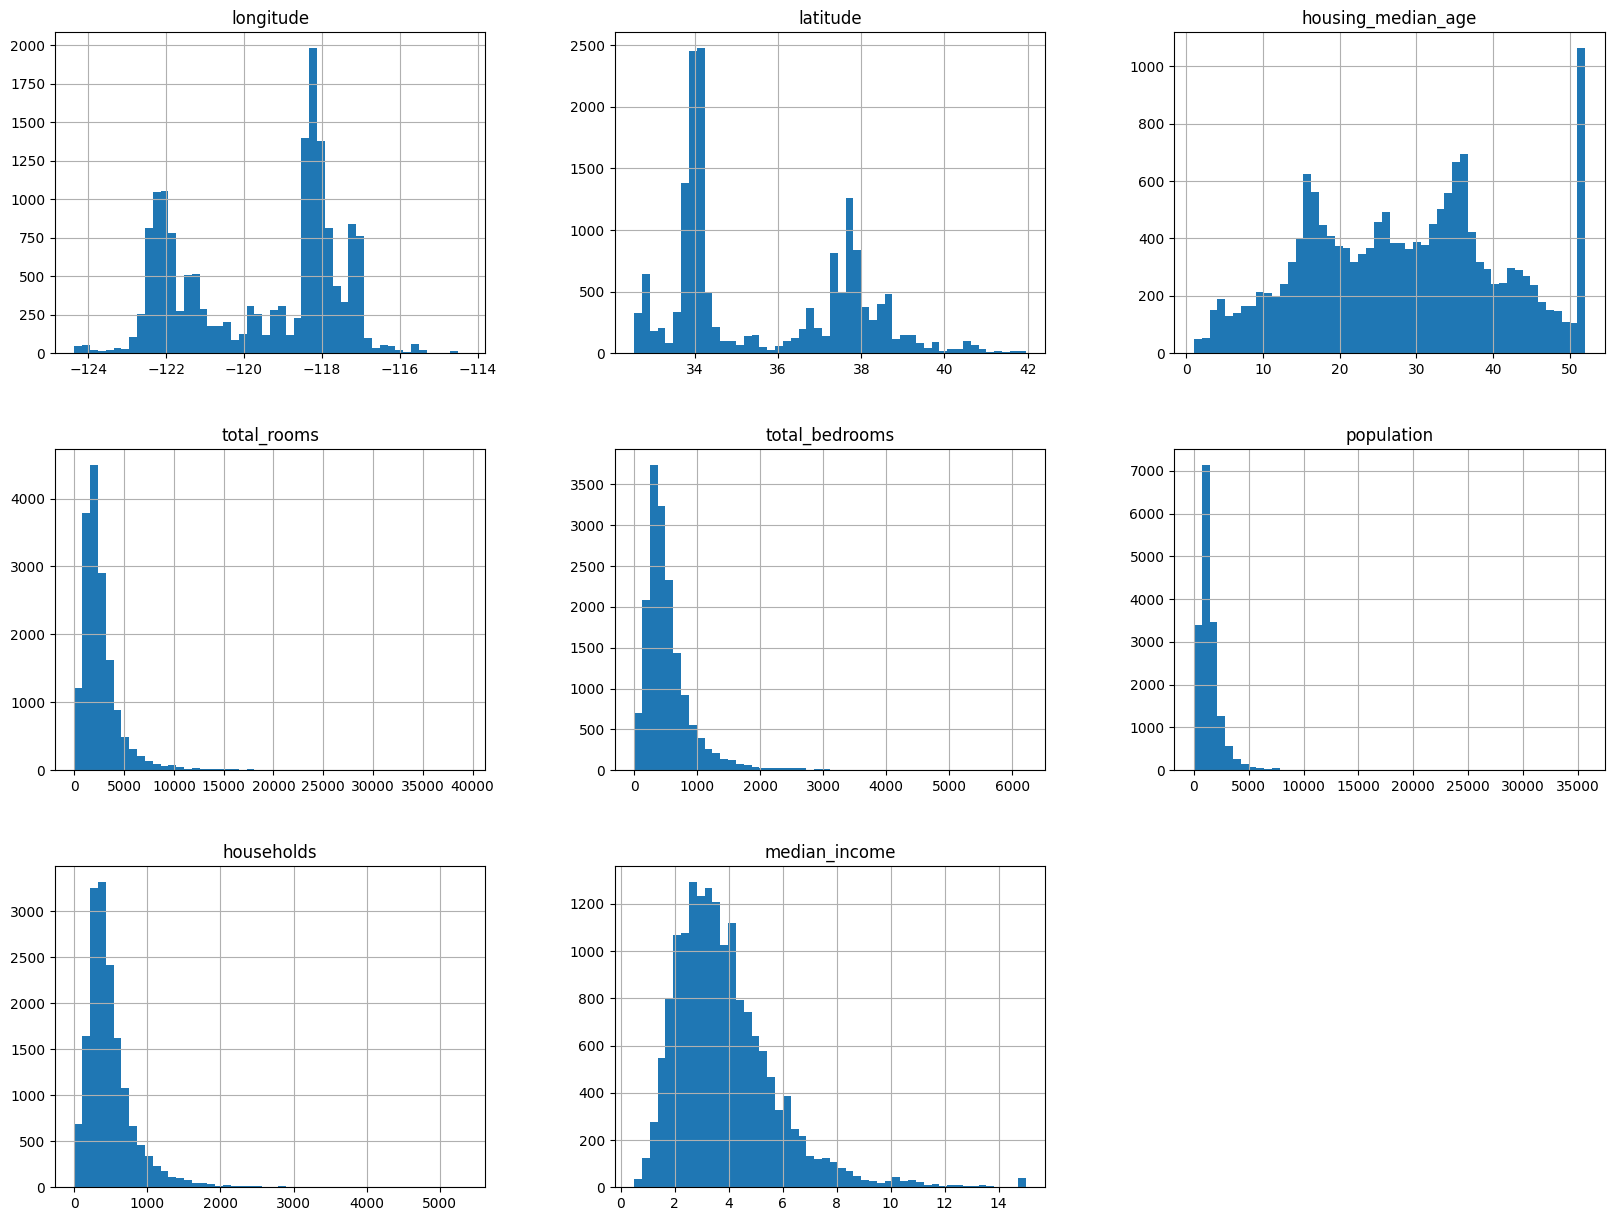

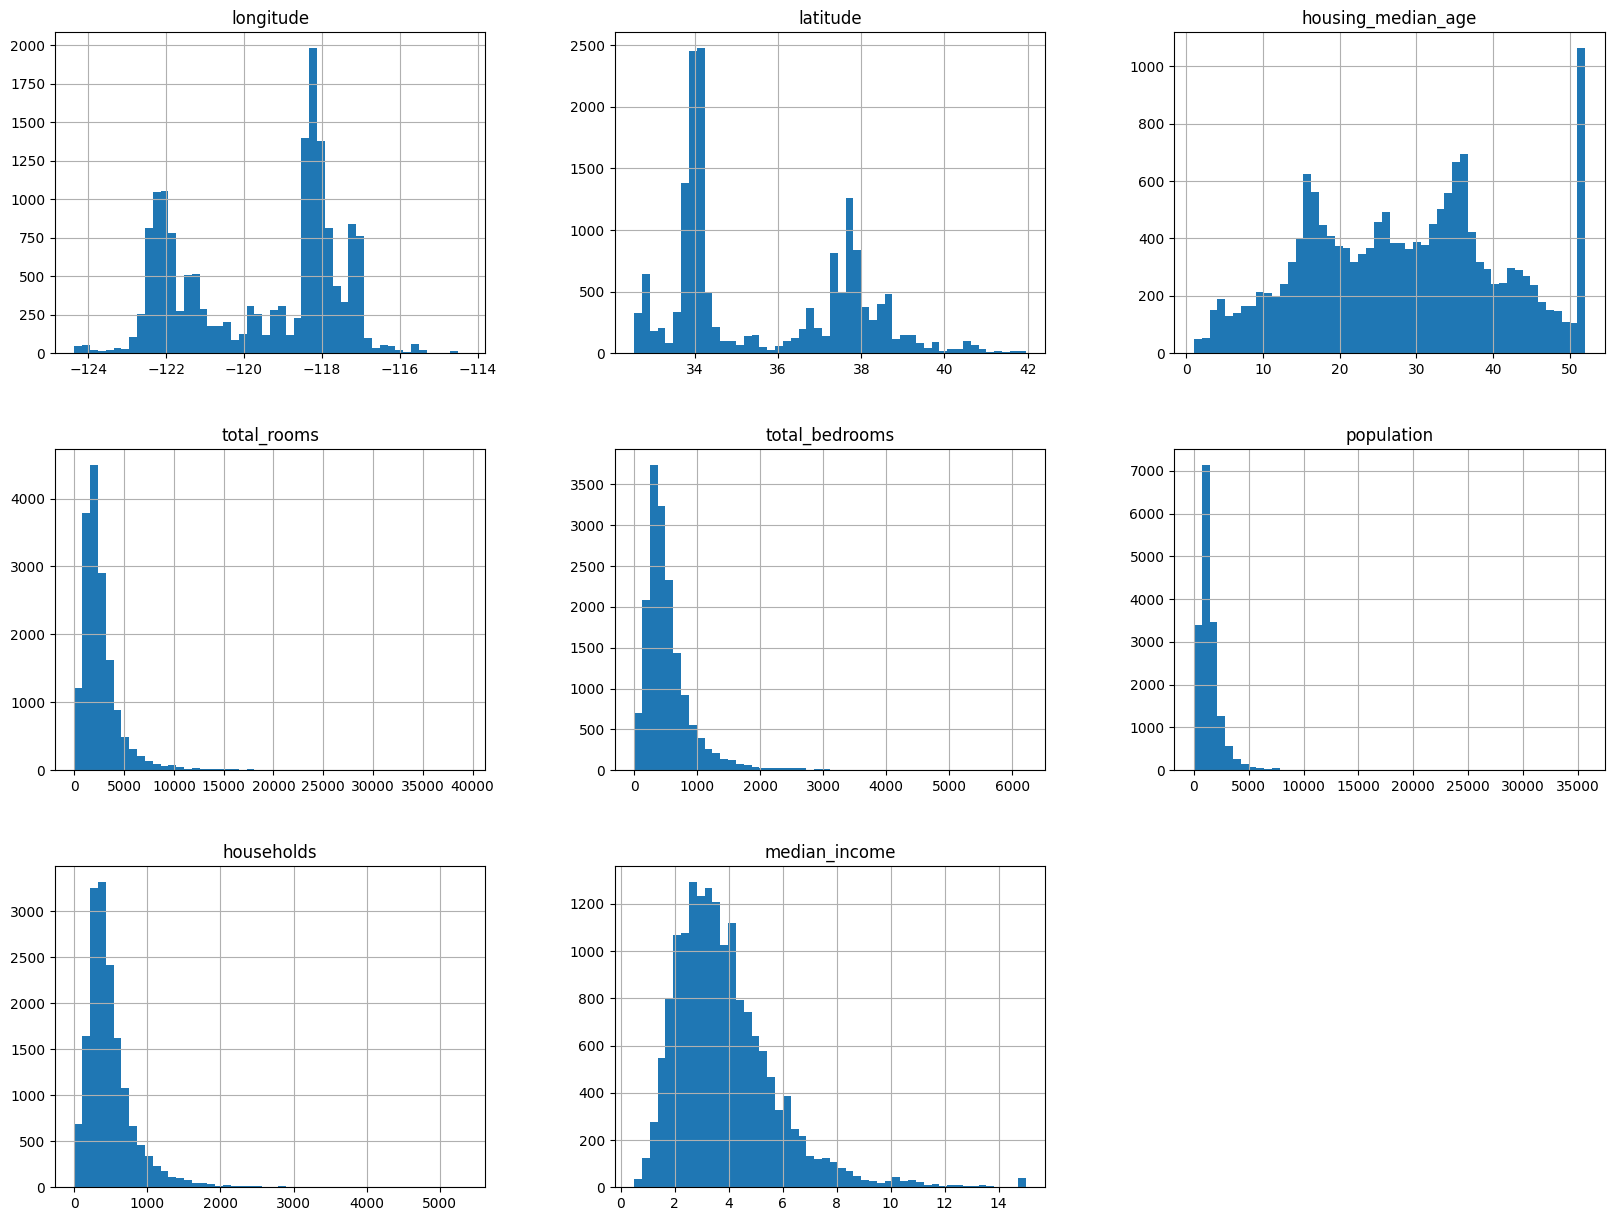

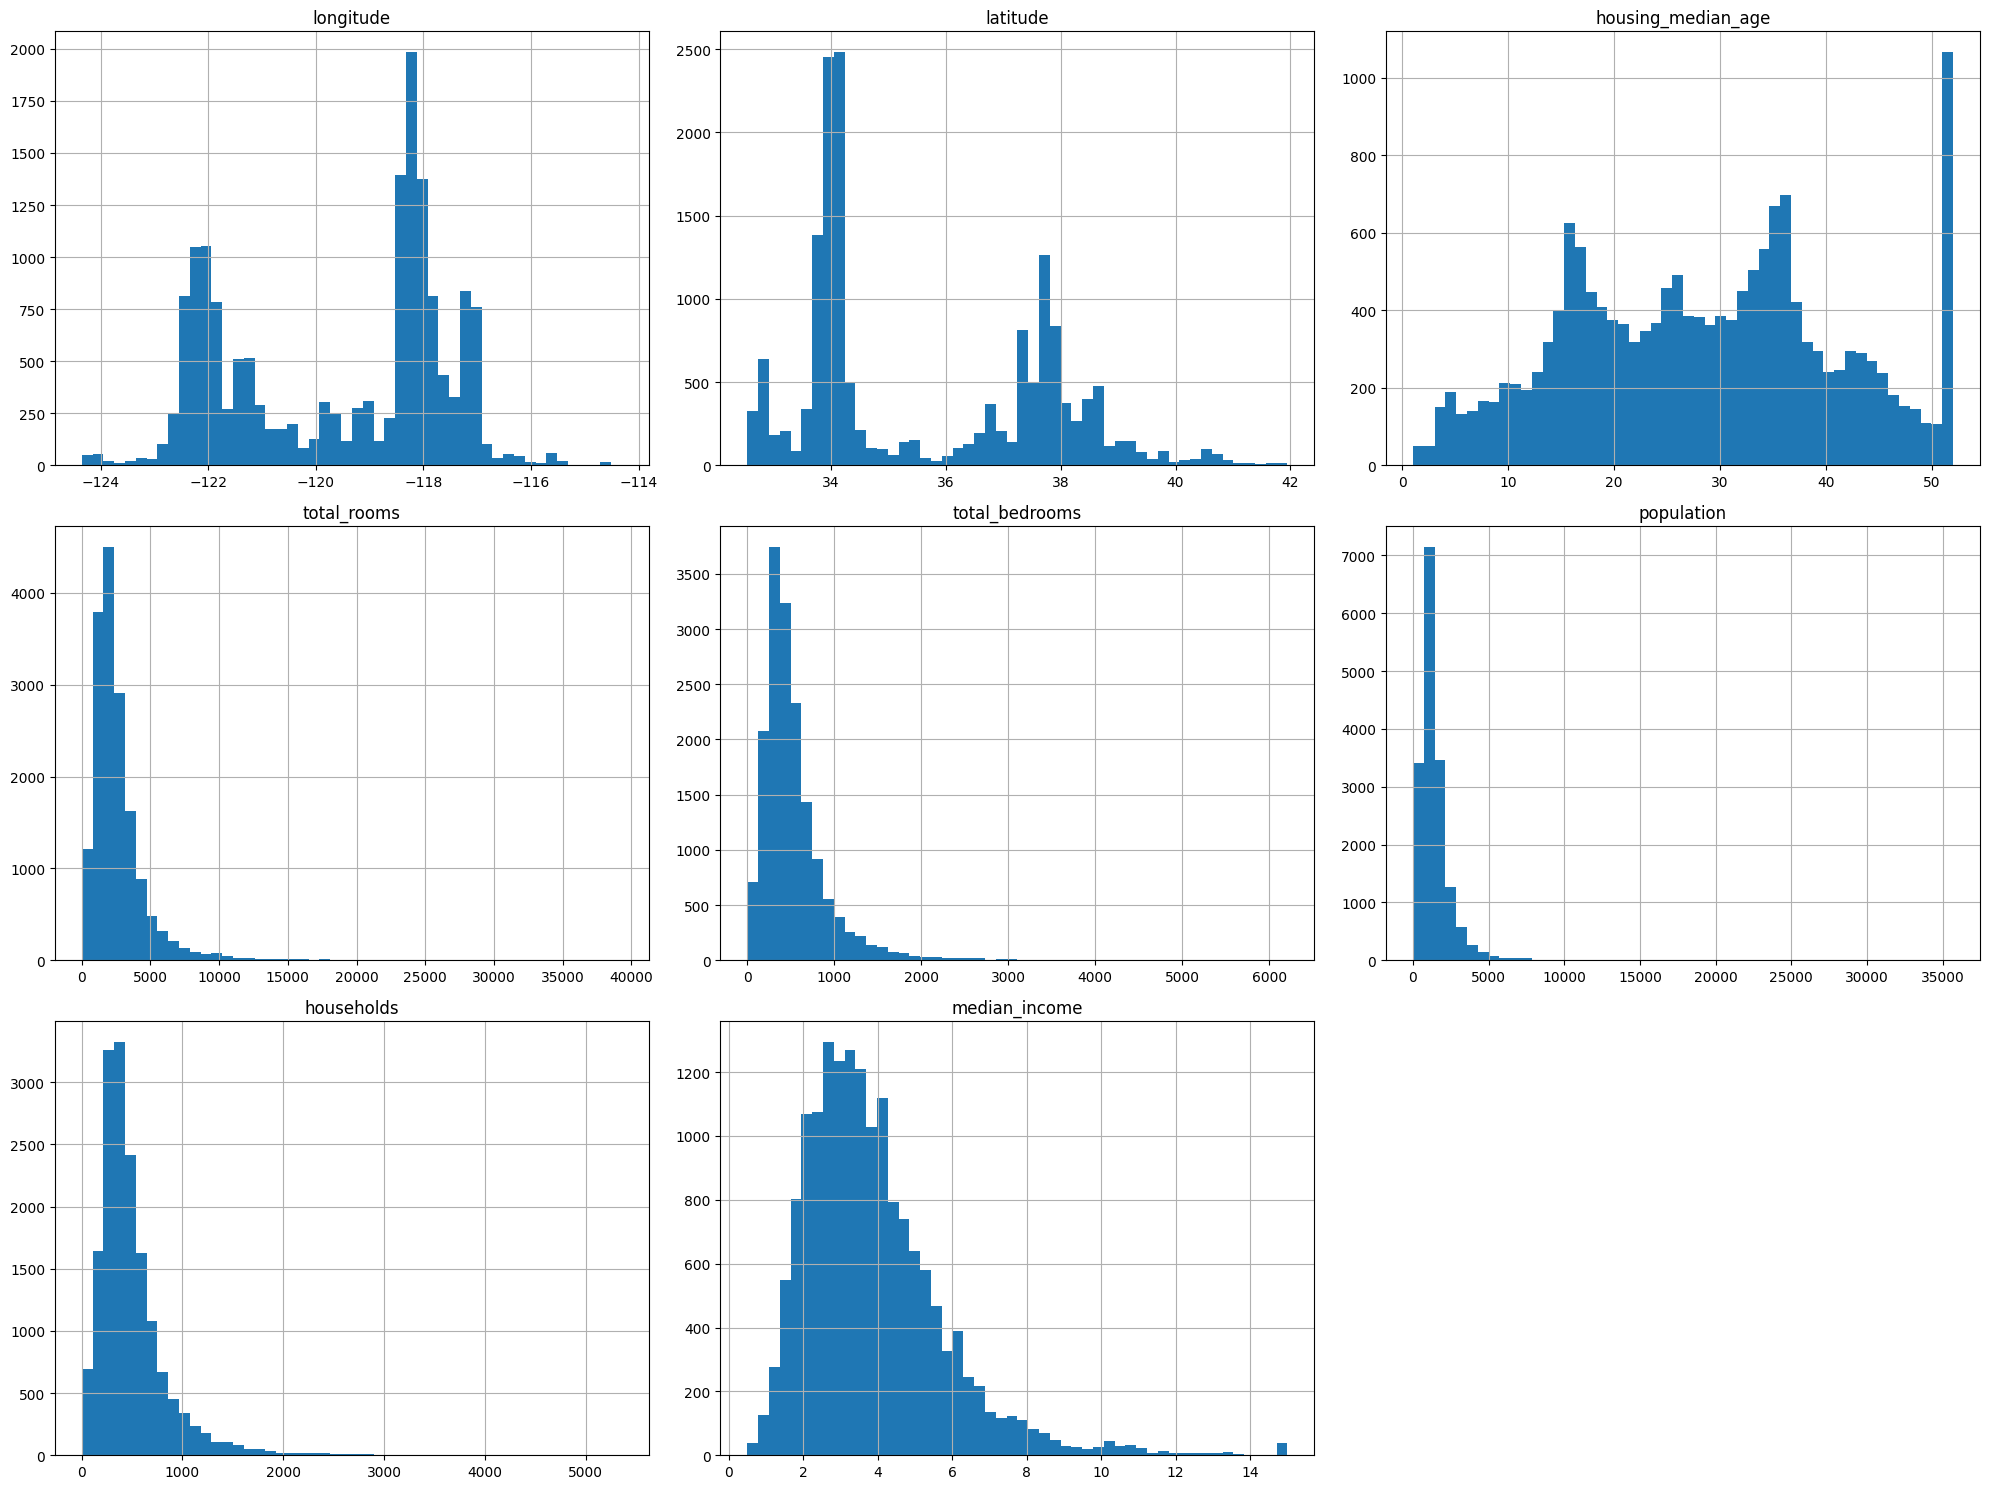

Feature statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.575635     35.639314           28.653404   2622.539789   
std        2.001828      2.137963           12.574819   2138.417080   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.800000     33.940000           18.000000   1443.000000   
50%     -118.510000     34.260000           29.000000   2119.000000   
75%     -118.010000     37.720000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    16512.000000  16512.000000  16512.000000   16512.000000  
mean       534.914639   1419.687379    497.011810       3.875884  
std        410.686426   1115.663036    375.696156       1.904931  
min          2.000000      3.000000      2.000000       0.499900  
25%  

In [ ]:
# Configure matplotlib for inline plotting
%matplotlib inline

housing_tr.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_tr)
housing_scaled = pd.DataFrame(housing_scaled, columns=housing_tr.columns, index=housing_tr.index)

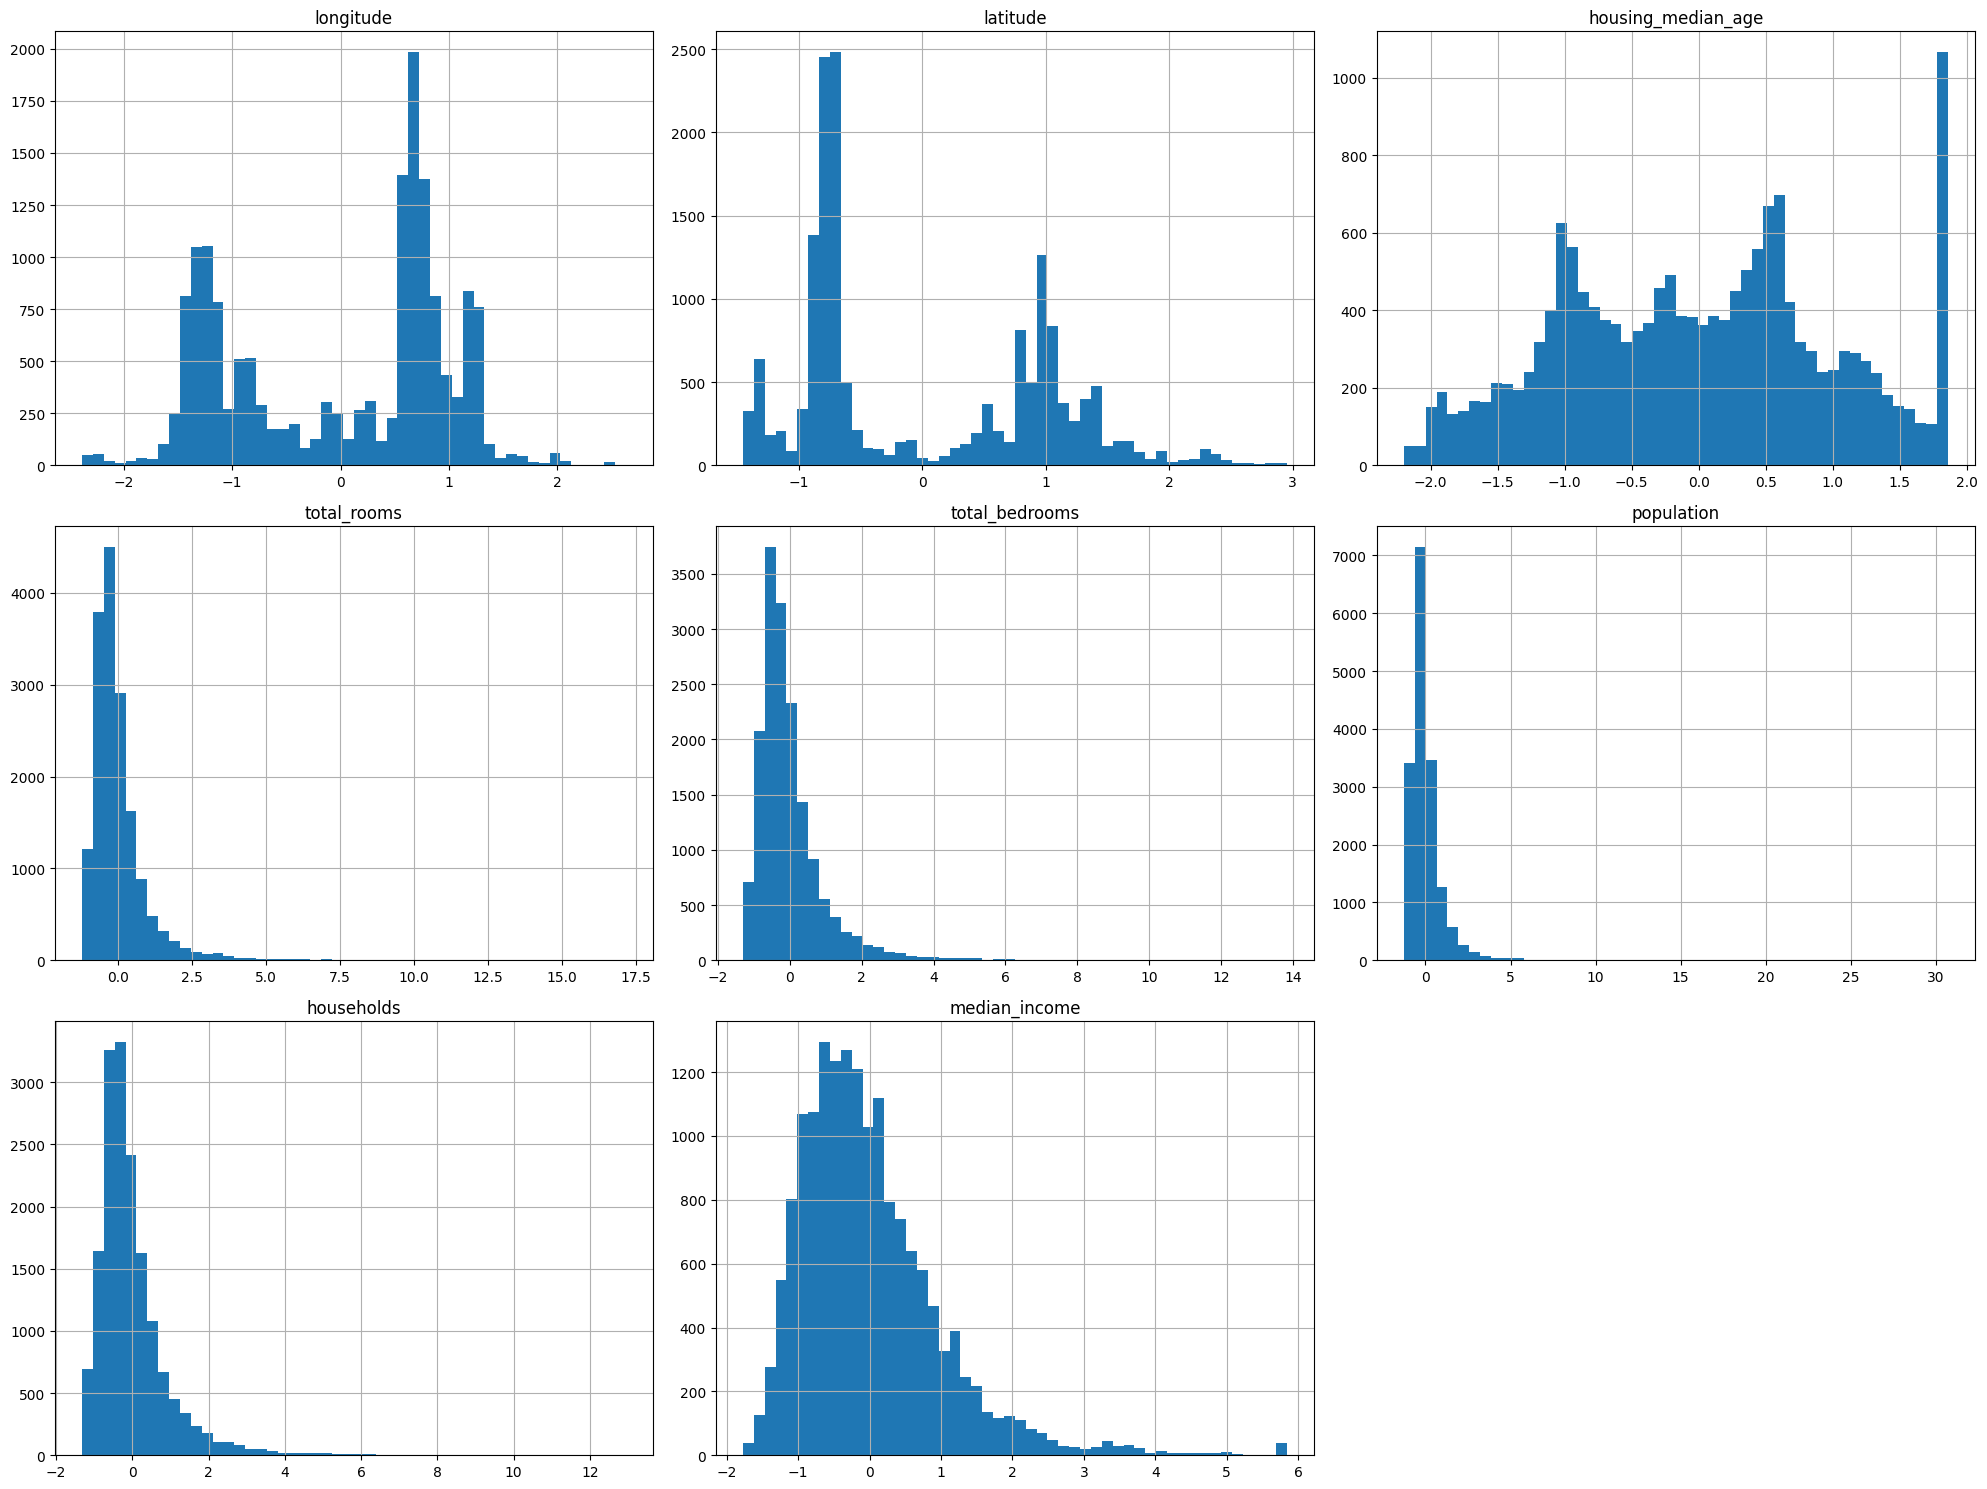

In [28]:
housing_scaled.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
housing_minmax_scaled = min_max_scaler.fit_transform(housing_tr)
housing_minmax_scaled = pd.DataFrame(housing_minmax_scaled, columns=housing_tr.columns, index=housing_tr.index)

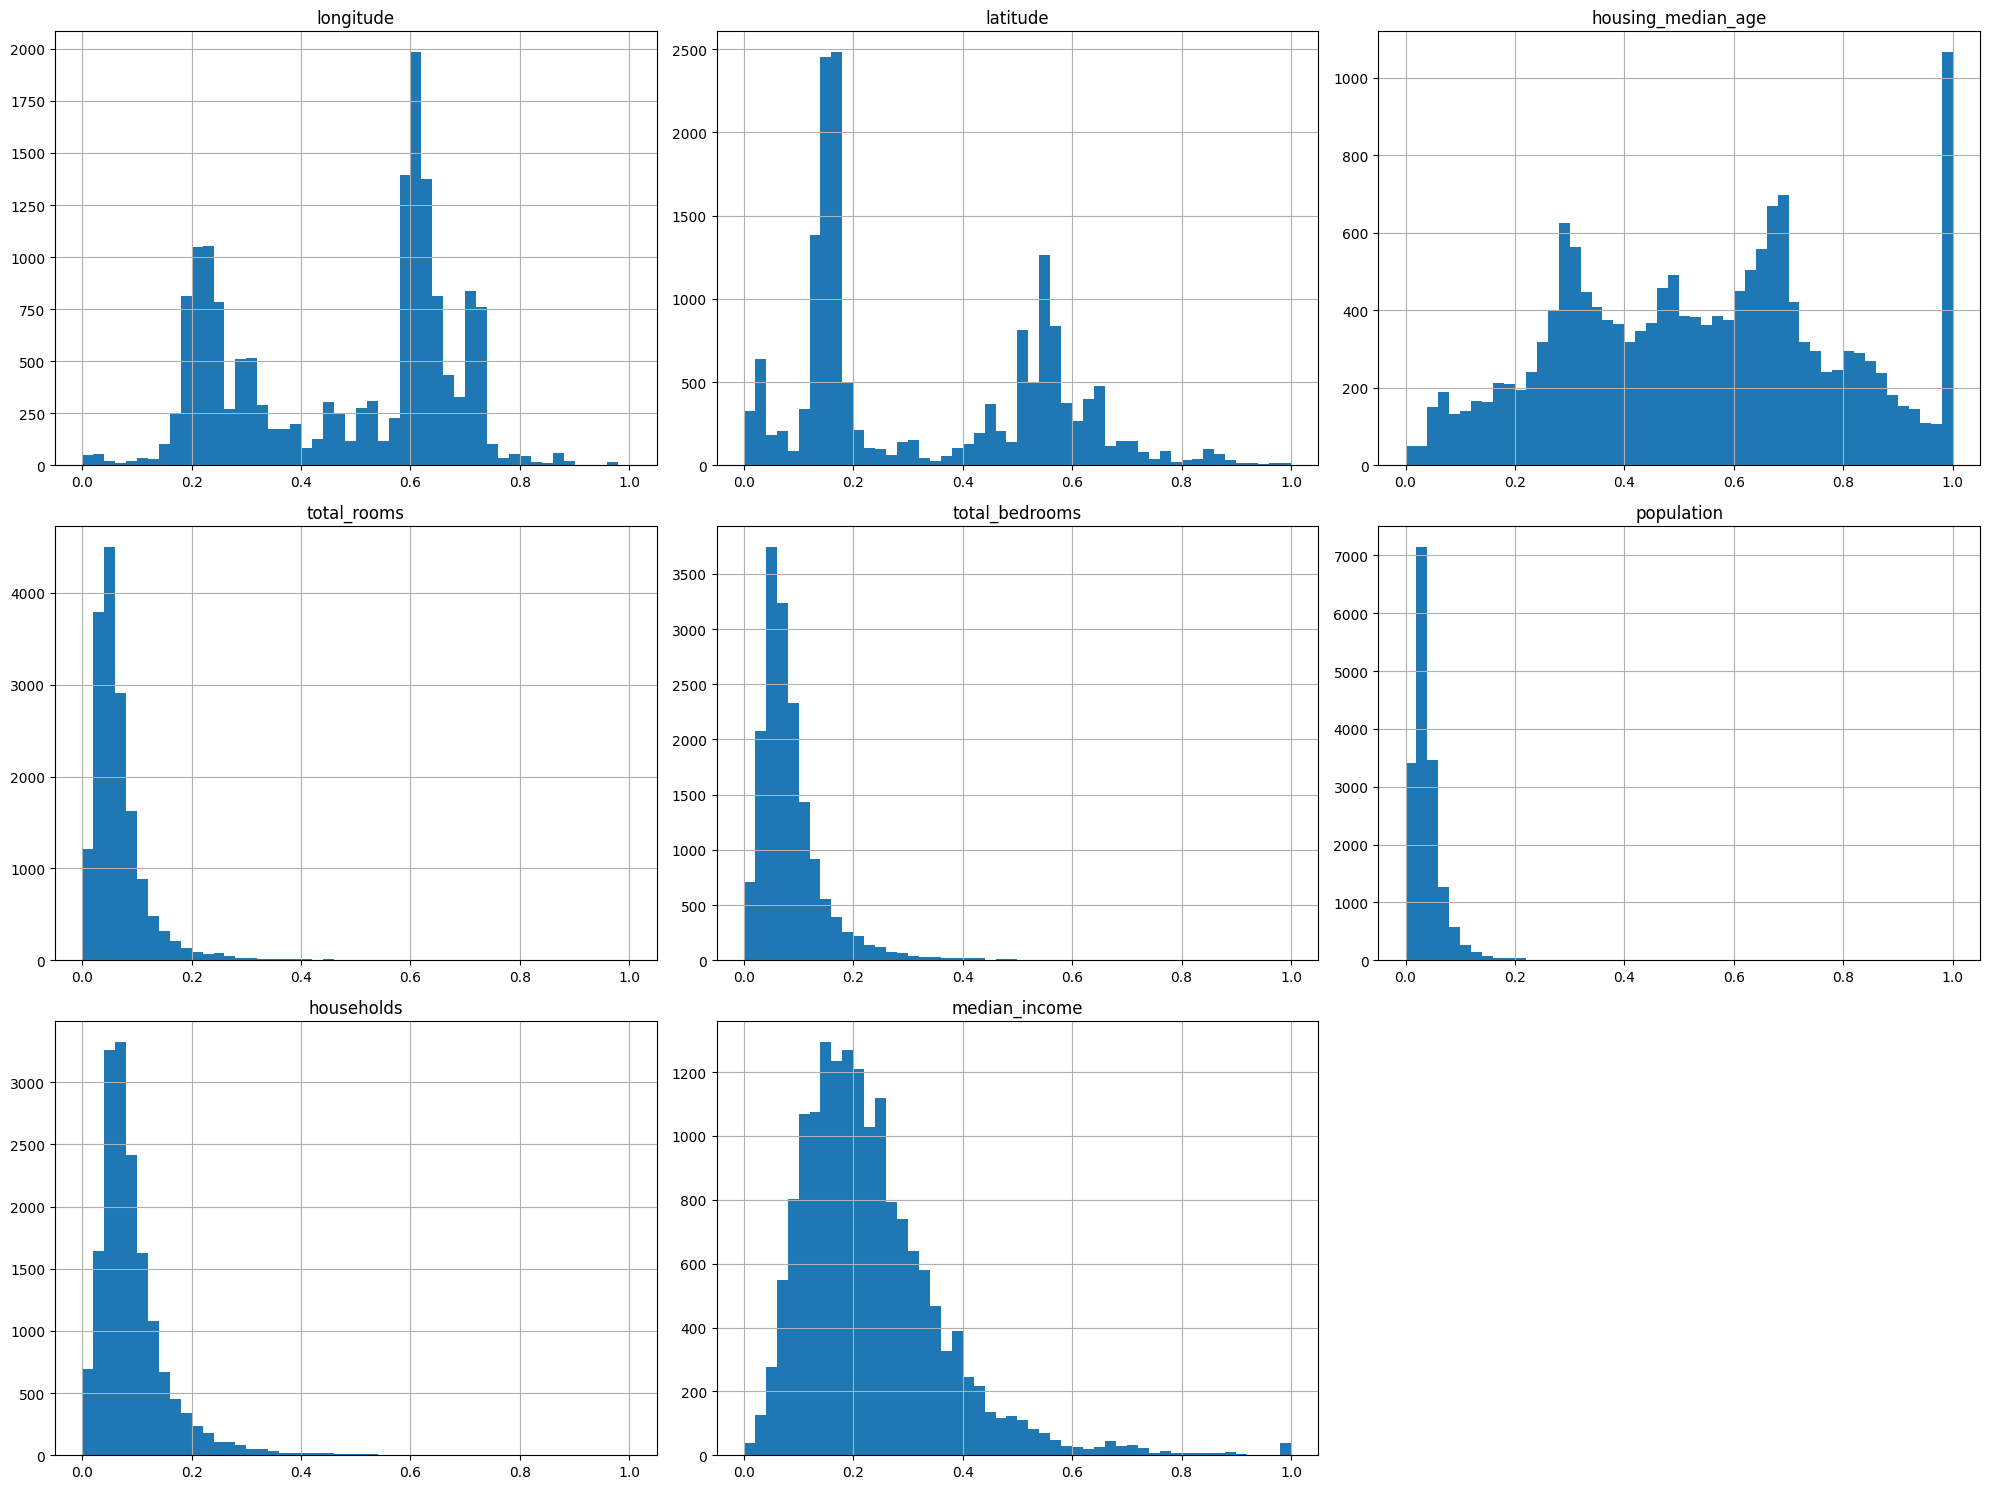

In [31]:
housing_minmax_scaled.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

### Categorical variable 

In [34]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(housing_cat)
X = cat_imputer.transform(housing_cat)
housing_cat = pd.DataFrame(X, columns=housing_cat.columns, index=housing_cat.index)
housing_cat.isnull().sum()

ocean_proximity    0
dtype: int64

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded_df = pd.DataFrame(housing_cat_encoded, columns=housing_cat.columns, index=housing_cat.index)
housing_cat_encoded_df.head()

,ocean_proximity
12655,1.0
15502,4.0
2908,1.0
14053,4.0
20496,0.0


In [36]:
# combine housing_minmax_scaled and housing_cat_encoded_df

housing_combined = pd.concat([housing_minmax_scaled, housing_cat_encoded_df], axis=1)

In [37]:
housing_combined.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,1.0
15502,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,4.0
2908,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,1.0
14053,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,4.0
20496,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.0


![](../documentation/E2E-ML.excalidraw.svg)

zsh:1: number expected
